In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import math
import operator
import datetime
import matplotlib.pyplot as plt

In [10]:

# STEP 1 Importing data 
data = pd.read_csv("nursery_data.csv")
data_np=pd.DataFrame(data).to_numpy() 
# STEP 2 Splitting data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data_np[:,:-1], data_np[:,8:], test_size=0.2) # 80% training and 20% test



In [11]:
# STEP 3 One hot Vector Encoding to convert string data to numeric

X_train_ohe = OneHotEncoder(handle_unknown='ignore').fit(X_train)
X_test_ohe = OneHotEncoder(handle_unknown='ignore').fit(X_test)
y_train_ohe = OneHotEncoder(handle_unknown='ignore').fit(y_train)
y_test_ohe = OneHotEncoder(handle_unknown='ignore').fit(y_test)


X_train_hv=X_train_ohe.transform(X_train).toarray()
X_test_hv=X_test_ohe.transform(X_test).toarray()
y_train_hv=y_train_ohe.transform(y_train).toarray()
y_test_hv=y_test_ohe.transform(y_test).toarray()


In [12]:
time_now=datetime.datetime.now().time()
print(datetime.datetime.now().time())


def euclideanDistance(data1, data2):
     return np.square(np.subtract(data1,data2))


# STEP 4 Defining our KNN model
def knn(trainingSet,train_org, testInstance, k):
    
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    for x in range(len(trainingSet)):
        
        vectfunc = np.vectorize(euclideanDistance)
        dist=np.sum(vectfunc(testInstance,trainingSet.iloc[x][:-1]))

        distances[x] = np.sqrt(dist)
  
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    classVotes = {}
    for x in range(len(neighbors)):
        response = train_org.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)

test = pd.DataFrame(X_test_hv)

trainSet_org=np.column_stack([X_train,y_train])
train_org = pd.DataFrame(trainSet_org)
train_org.columns=data.columns

trainSet=np.column_stack([X_train_hv,y_train])
train = pd.DataFrame(trainSet)


print('\n\nWith 5 Nearest Neighbour \n\n')
k = 5

count=0
for x in range(len(test)):
    result,neigh = knn(train,train_org, pd.DataFrame(np.array([test.iloc[x].to_numpy()])), k)
    print('Predicted Class of the datapoint = ', result,'original=',y_test[x][0])
    if result!=y_test[x][0]:
        count=count+1

print('error_count=',count)
correct=len(test)-count
print('correct_count=',correct)
print('accuracy=',(correct/len(test))*100)
print(datetime.datetime.now().time())


03:04:51.421127


With 5 Nearest Neighbour 


Predicted Class of the datapoint =  not_recom original= not_recom
Predicted Class of the datapoint =  spec_prior original= priority
Predicted Class of the datapoint =  priority original= spec_prior
Predicted Class of the datapoint =  priority original= priority


KeyboardInterrupt: 

In [13]:
time_now=datetime.datetime.now().time()
print(datetime.datetime.now().time())


def euclideanDistance(data1, data2):
     return np.square(np.subtract(data1,data2))


# STEP 4 Defining our KNN model
def knn(trainingSet,train_org, testInstance, k):
    
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    for x in range(len(trainingSet)):
        
        vectfunc = np.vectorize(euclideanDistance)
        dist=np.sum(vectfunc(testInstance,trainingSet.iloc[x][:-1]))

        distances[x] = np.sqrt(dist)
  
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    classVotes = {}
    for x in range(len(neighbors)):
        response = train_org.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)

test = pd.DataFrame(X_test_hv)

trainSet_org=np.column_stack([X_train,y_train])
train_org = pd.DataFrame(trainSet_org)
train_org.columns=data.columns

trainSet=np.column_stack([X_train_hv,y_train])
train = pd.DataFrame(trainSet)


print('\n\nWith 7 Nearest Neighbour \n\n')
k = 7

count=0
for x in range(len(test)):
    result,neigh = knn(train,train_org, pd.DataFrame(np.array([test.iloc[x].to_numpy()])), k)
    print('Predicted Class of the datapoint = ', result,'original=',y_test[x][0])
    if result!=y_test[x][0]:
        count=count+1

print('error_count=',count)
correct=len(test)-count
print('correct_count=',correct)
print('accuracy=',(correct/len(test))*100)
print(datetime.datetime.now().time())


19:49:19.882961


With 7 Nearest Neighbour 


Predicted Class of the datapoint =  spec_prior original= spec_prior
Predicted Class of the datapoint =  spec_prior original= spec_prior
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  not_recom original= not_recom
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  spec_prior original= spec_prior
Predicted Class of the datapoint =  not_recom original= not_recom
Predicted Class of the datapoint =  not_recom original= not_recom
Predicted Class of the datapoint =  spec_prior original= spec_prior
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  spec_prior original= spec_prior
Predicted Class of the datapoint =  spec_prior original= spec_prior
Predicted Class of the datapoint =  spec_prior original= spec_prior
Predicted Class of the datapoint =  not_recom original= not_recom
Predicted Class of the

In [36]:
print('\n\nWith 9 Nearest Neighbour \n\n')
k = 9


count=0
for x in range(len(test)):
    result,neigh = knn(train,train_org, pd.DataFrame(np.array([test.iloc[x].to_numpy()])), k)
# Predicted class
    print('Predicted Class of the datapoint = ', result,'original=',y_test[x][0])
    if result!=y_test[x][0]:
        count=count+1

print('error_count=',count)
correct=len(test)-count
print('correct_count=',correct)
print('accuracy=',(correct/len(test))*100)
print(datetime.datetime.now().time())



With 9 Nearest Neighbour 


Predicted Class of the datapoint =  not_recom original= not_recom
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  spec_prior original= spec_prior
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  not_recom original= not_recom
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  spec_prior original= spec_prior
Predicted Class of the datapoint =  not_recom original= not_recom
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  not_recom original= not_recom
Predicted Class of the datapoint =  priority original= priority
Predicted Class of the datapoint =  not_recom original= no

In [ ]:
print('\n\nWith 11 Nearest Neighbour \n\n')
k = 11


count=0
for x in range(len(test)):
    result,neigh = knn(train,train_org, pd.DataFrame(np.array([test.iloc[x].to_numpy()])), k)
# Predicted class
    print('Predicted Class of the datapoint = ', result,'original=',y_test[x][0])
    if result!=y_test[x][0]:
        count=count+1

print('error_count=',count)
correct=len(test)-counti90
print('correct_count=',correct)
print('accuracy=',(correct/len(test))*100)
print(datetime.datetime.now().time())

In [20]:
#the jupyter notebook shell was closed many times so variable values were not saved. Manually entered the accuracies from the above runs and plotted the elbows below
import numpy as np
import matplotlib.pyplot as plt
accuracies=np.array([92.515,94.09,96.29,96.64])
k_value=np.array([5,7,9,11])

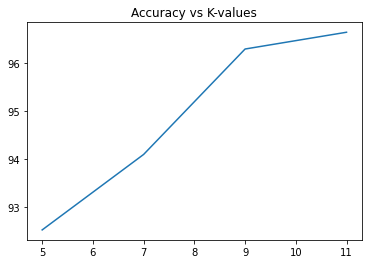

In [21]:
plt.plot(k_value,accuracies)
plt.title("Accuracy vs K-values")
plt.show()

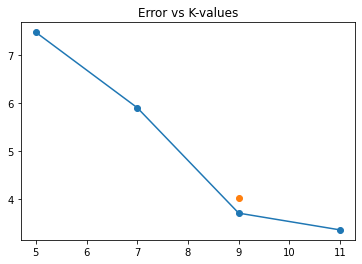

In [22]:
plt.plot(k_value,100-accuracies)
plt.scatter(k_value,100-accuracies)
#print(k_value[3].)
plt.scatter(np.array([9]),100-np.array([95.98]))
plt.title("Error vs K-values")
plt.show()